### Testing The Model

In [1]:
#importing Lobraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Loading Model
model = tf.keras.models.load_model( '/kaggle/input/plant-disease-predictor/keras/v1/1/trained_plant_model.keras')

In [3]:
#model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

**Visualizing Single Image from TEST SET**

In [4]:
!pip install opencv-python

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [5]:
import cv2

In [6]:
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust2.JPG'

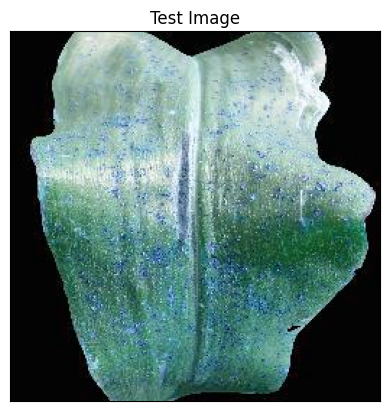

In [7]:
#image visualization
img = cv2.imread(image_path)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.imshow(img)

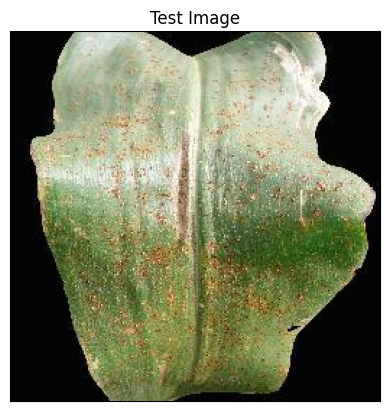

In [8]:
# convert the original image to rgb

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.imshow(img)

**Testing model**


In [10]:
#preprocessing the image as per the model specification
image = tf.keras.preprocessing.image.load_img(image_path, target_size = (128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)

In [11]:
input_arr = np.array([input_arr]) #convert single image to a batch

In [12]:
input_arr

array([[[[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.],
         ...,
         [3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.],
         ...,
         [3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.],
         ...,
         [3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        ...,

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.],
         ...,
         [3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.],
         ...,
         [3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.],
         ...,
         [3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]]]], dtype=float32)

In [13]:
print(input_arr.shape)

(1, 128, 128, 3)


In [14]:
#predicting
prediction =  model.predict(input_arr)
prediction.shape

I0000 00:00:1731233576.683576      75 service.cc:145] XLA service 0x78d1dc003280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731233576.683643      75 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


I0000 00:00:1731233578.372203      75 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


(1, 38)

In [15]:
prediction

array([[2.60495179e-27, 4.75169875e-30, 9.51517846e-29, 1.36826144e-31,
        3.38047265e-34, 2.17599145e-31, 3.24203046e-32, 1.20175888e-19,
        1.00000000e+00, 8.31510335e-28, 1.82669321e-25, 6.05888560e-36,
        8.30712454e-33, 7.58442527e-29, 1.43684187e-34, 7.80139065e-38,
        2.73675774e-32, 1.05725755e-32, 1.02865007e-31, 1.44066000e-29,
        2.91394364e-23, 4.44185829e-39, 1.36944886e-28, 3.64660747e-36,
        1.00004273e-36, 6.37224316e-30, 5.96043578e-25, 4.94300074e-38,
        1.50236486e-36, 3.98154585e-26, 4.09637364e-24, 2.80156046e-33,
        2.60019380e-29, 1.40129846e-45, 1.30954341e-33, 4.41069902e-40,
        9.16930906e-38, 7.87819940e-28]], dtype=float32)

In [16]:
result_index = np.argmax(prediction)

In [17]:
result_index

8

In [18]:
class_name= ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [19]:
model_prediction =  class_name[result_index]
model_prediction

'Corn_(maize)___Common_rust_'

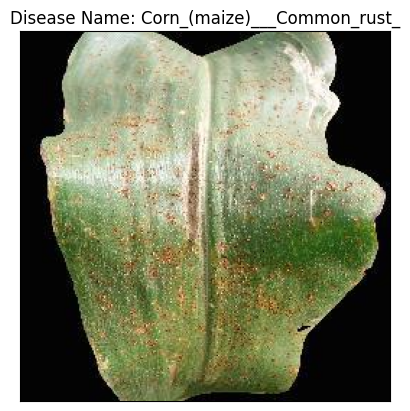

In [20]:
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.imshow(img)